KNN is a lazy learner (no labels)

In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
np.unique(y)

array([0, 1, 2])

In [45]:
len(np.unique(y))

3

In [46]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))  # a-b element wise

In [47]:
def knn_predict(X_train, y_train, X_test_instance, k=3):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(X_test_instance, X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    
    k_nearest_labels = [label for _, label in distances[:k]]

    # Majority vote
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
k = 3
predictions = [knn_predict(X_train, y_train, x, k=k) for x in X_test]

set(predictions)


{0, 1, 2}

In [50]:
from sklearn.metrics import classification_report, confusion_matrix


print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=iris.target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


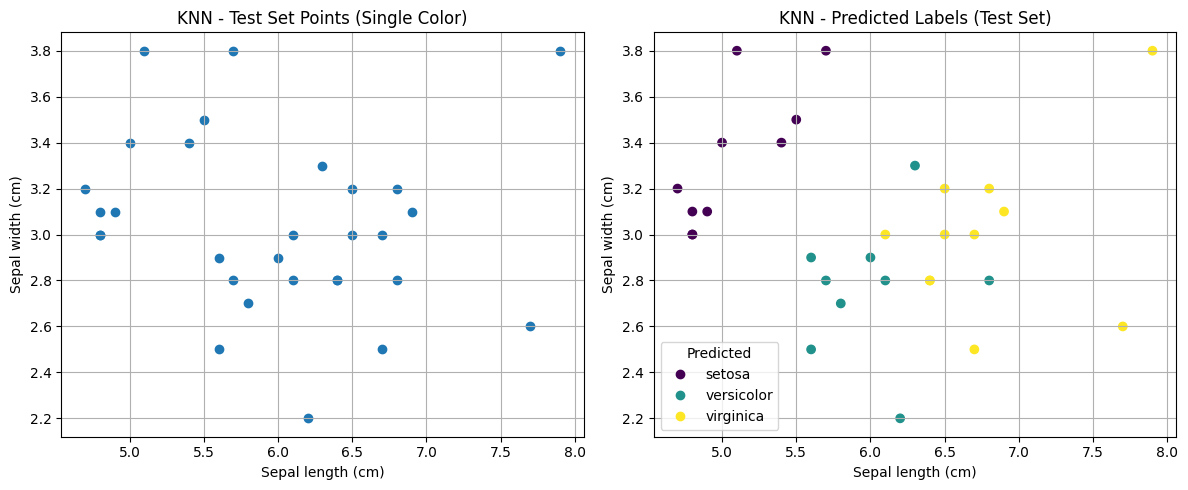

In [68]:
import matplotlib.pyplot as plt


class_names = iris.target_names


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.title("KNN - Test Set Points (Single Color)")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.grid(True)


plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions,cmap='viridis')
plt.title("KNN - Predicted Labels (Test Set)")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.grid(True)
plt.legend(handles=scatter2.legend_elements()[0],labels=['setosa', 'versicolor', 'virginica'], title="Predicted")

plt.tight_layout()
plt.show()
